In [1]:
import sys
import obspy
from obspy.imaging.beachball import beachball, beach
# from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import PIL
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from dateutil import parser
from datetime import datetime, timezone

#from obspy import read_inventory, read_events
import pandas as pd
from scipy.integrate import * # "quad" function

%matplotlib inline

# Load datasets
1. Earthquakes

2. Slab 2.0

In [167]:
# Earthquake
data = pd.read_csv('eq_data.csv', parse_dates=['DATE'])
# thresh_seaward = 1 #distance from the trench
data = data[data['P(km)'] > -200] #covering just forebulge region, means 200 km away seawards from the trench
# data = data[data['P(km)'] < 100]
data = data[data['DEPTH'] < 50]

In [143]:
# data.to_csv('hrdata_modified.csv')
# data['P(km)'].min() #distance from the trench
# data['P(km)'].max()
# fig, ax1 = plt.subplots(dpi = 300)
# plot = ax1.plot(data['ALONG'], data['P(km)'], '^', color='royalblue', alpha = 0.9, markersize = 4, linewidth = 0.1)
# plo
data['P(km)'].max()

-10.07312374

In [1]:
# slab
slab_fname = '/Users/mohd0001/PhD_Monash/Data/slab/depth_at_prof_50.csv'

slab_length = pd.read_csv(slab_fname, sep = ',', header = 'infer')
slab_length=slab_length.append(slab_length, ignore_index=True)
slab_length = slab_length.sort_values(by = 'ALONG',ascending=True)
length = np.asarray(slab_length['LENGTH'])

NameError: name 'pd' is not defined

Create a new col of total sesimic moment by joining 'MO' and 'EX' cols

In [5]:
# data['MO_EX'] = data['MO']*np.power(10., data['EX'])

In [6]:
# # Add col of calculated cumulative sum of MO
# data['CUM_MO'] = np.cumsum(data['MO_EX'])
# data['SQRT_CUM'] = np.sqrt(data['CUM_MO'])
# data['STRAIN_CUM'] = np.cumsum(data['SQRT_CUM'])

# MTHRUST events

Text(0, 0.5, '$\\Sigma$$M_o$ along swath')

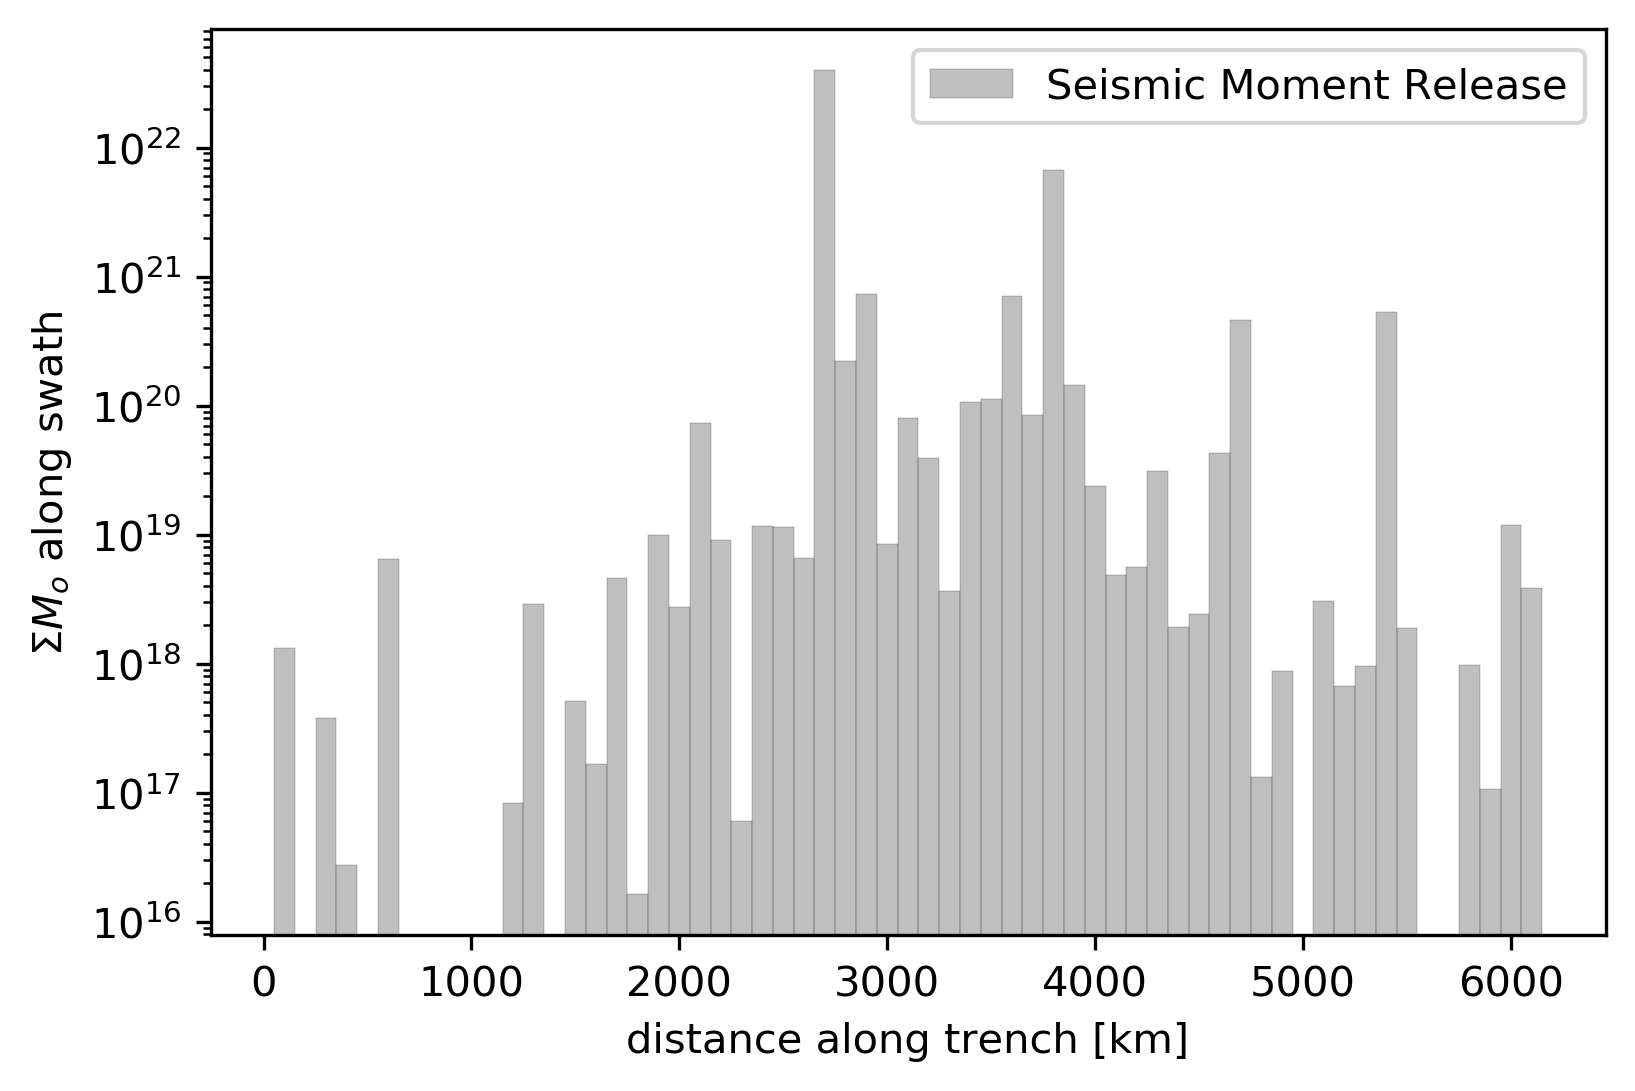

In [7]:
data_MT = data.loc[data['CLASS'] == 'MTHRUST']

#Plot the cumulative seismic moment released along the trench
data_df = data_MT.sort_values(by = 'ALONG',ascending=True)
data_along_pos = pd.unique(data_df['ALONG'])
data_along_energy = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy.append(np.sum(energy))
    
data_along_energy = np.asarray(data_along_energy)

fig = plt.figure(dpi = 300)

width = 100

plt.bar(data_along_pos, data_along_energy, color = 'gray', linewidth = 0.1, edgecolor = 'k', width = width, alpha = 0.5, label= 'Seismic Moment Release')
plt.yscale('log')
plt.legend()

plt.xlabel('distance along trench [km]')
#plt.ylabel(r'$\Sigma M_o$')
plt.ylabel(r'$\Sigma$$M_o$ along swath')
# plt.title('Megathrust Earthquakes along trench (1976-2019)')

Now plot slab depth on the other axis

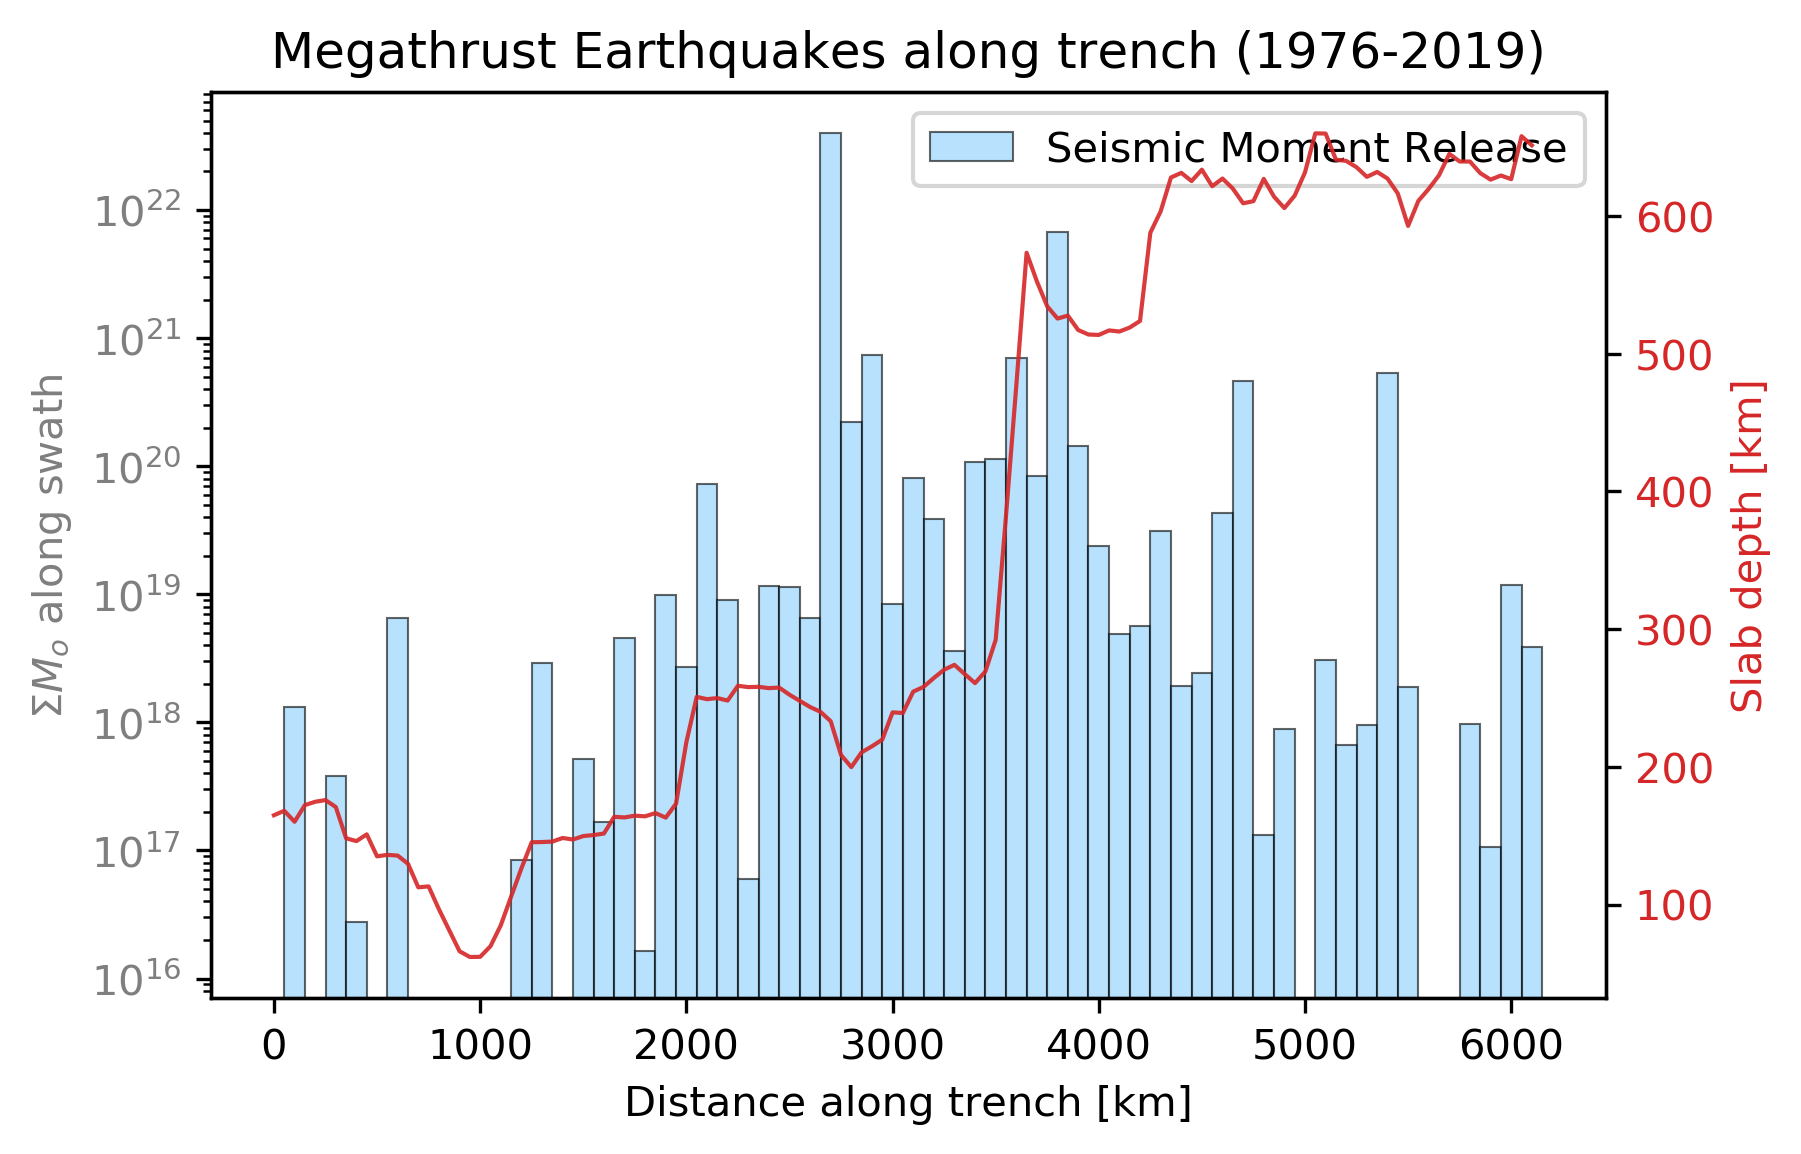

In [8]:
fig, ax1 = plt.subplots(dpi = 300)

plt.yscale('log')
color = 'tab:gray'
ax1.set_xlabel('Distance along trench [km]')
ax1.set_ylabel(r'$\Sigma$$M_o$ along swath', color=color)  # we already handled the x-label with ax1
plot = ax1.bar(data_along_pos, data_along_energy, color = 'lightskyblue', linewidth = 0.5, edgecolor = 'k', width = width, alpha = 0.6, label= 'Seismic Moment Release')
ax1.tick_params(axis='y', labelcolor=color)
plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Slab depth [km]', color=color)
ax2.plot(slab_length['ALONG'], slab_length['LENGTH']*-1, '-', color=color, alpha = 0.9, markersize = 3, linewidth = 1)
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim([-30, 20])
# ax2.set_xlim([0, 5000])
plt.title('Megathrust Earthquakes along trench (1976-2019)')
plt.savefig('MTHRUST_mo_vs_trench.png', dpi = 300)

# Upper plate data analysis and plotting

In [51]:
data_UP = data.loc[data['CLASS'] == 'UPPER']
data_T_UP = data_UP.loc[data_UP['TYPE'] == 'THRUST']
data_SS_UP = data_UP.loc[data_UP['TYPE'] == 'SS']
data_N_UP = data_UP.loc[data_UP['TYPE'] == 'NORM']

In [52]:
data_df = data_T_UP.sort_values(by = 'ALONG',ascending=True)
data_along_pos = pd.unique(data_df['ALONG'])
data_along_energy = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy.append(np.sum(energy))
    
data_along_energy = np.asarray(data_along_energy)

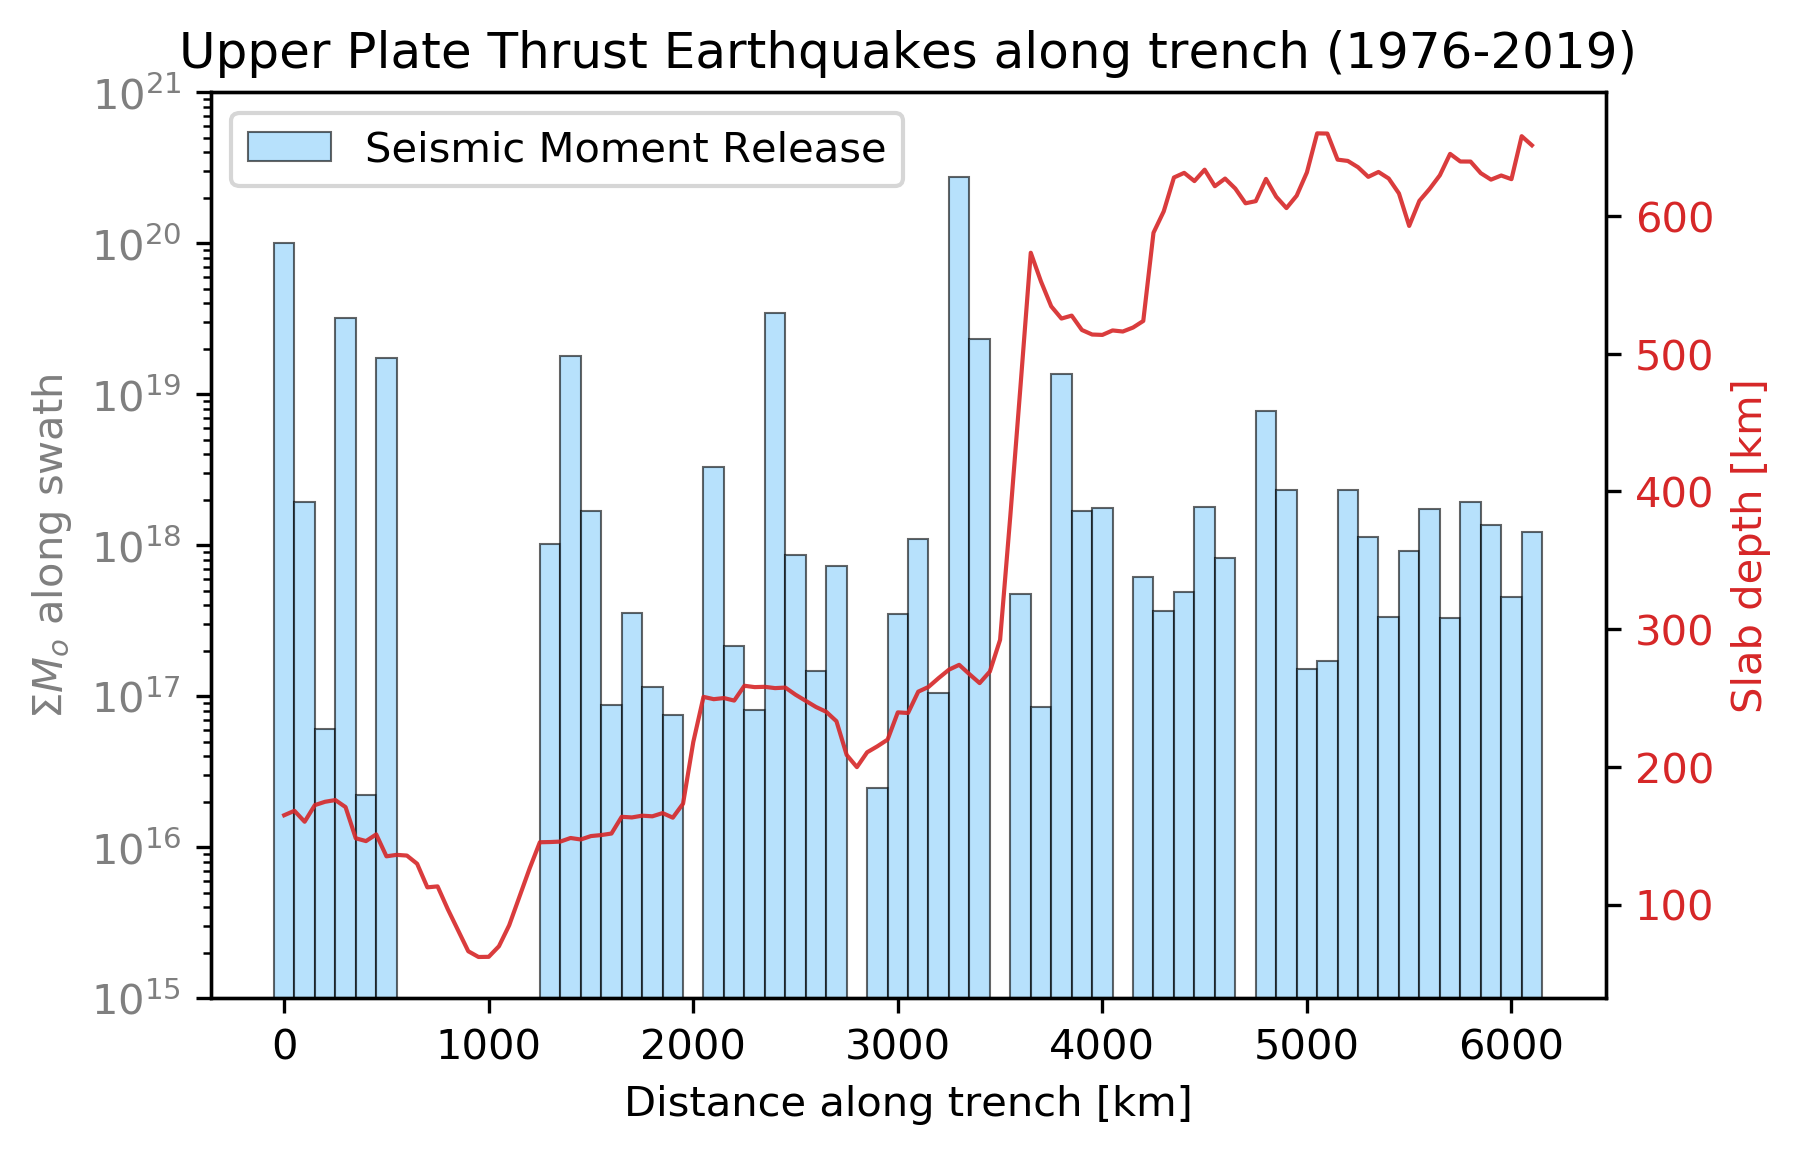

In [19]:
fig, ax1 = plt.subplots(dpi = 300)

plt.yscale('log')
color = 'tab:gray'
ax1.set_xlabel('Distance along trench [km]')
ax1.set_ylabel(r'$\Sigma$$M_o$ along swath', color=color)  # we already handled the x-label with ax1
plot = ax1.bar(data_along_pos, data_along_energy, color = 'lightskyblue', linewidth = 0.5, edgecolor = 'k', width = width, alpha = 0.6, label= 'Seismic Moment Release')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([1e15, 1e21])
plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Slab depth [km]', color=color)
ax2.plot(slab_length['ALONG'], slab_length['LENGTH']*-1, '-', color=color, alpha = 0.9, markersize = 3, linewidth = 1)
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim([-30, 20])
# ax2.set_xlim([0, 5000])
# plt.title('Upper Plate Strike-Slip Earthquakes along trench (1976-2019)')
plt.title('Upper Plate Thrust Earthquakes along trench (1976-2019)')

plt.savefig('UP_T_mo_vs_trench.png', dpi = 300)

# Downgoing plate data separation and cumulative Mo plot

In [168]:
data_DW = data.loc[data['CLASS'] == 'DGOING']
data_T_DW = data_DW.loc[data_DW['TYPE'] == 'THRUST']
data_SS_DW = data_DW.loc[data_DW['TYPE'] == 'SS']
data_N_DW = data_DW.loc[data_DW['TYPE'] == 'NORM']

In [13]:
data_DW['DEPTH'].max()
# data = data[data['DEPTH'] < 50]

645.2

Plot cumulative energy release by thrust events

In [169]:
data_df = data_N_DW.sort_values(by = 'ALONG',ascending=True)
data_along_pos = pd.unique(data_df['ALONG'])
data_along_energy = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy.append(np.sum(energy))
    
data_along_energy = np.asarray(data_along_energy)

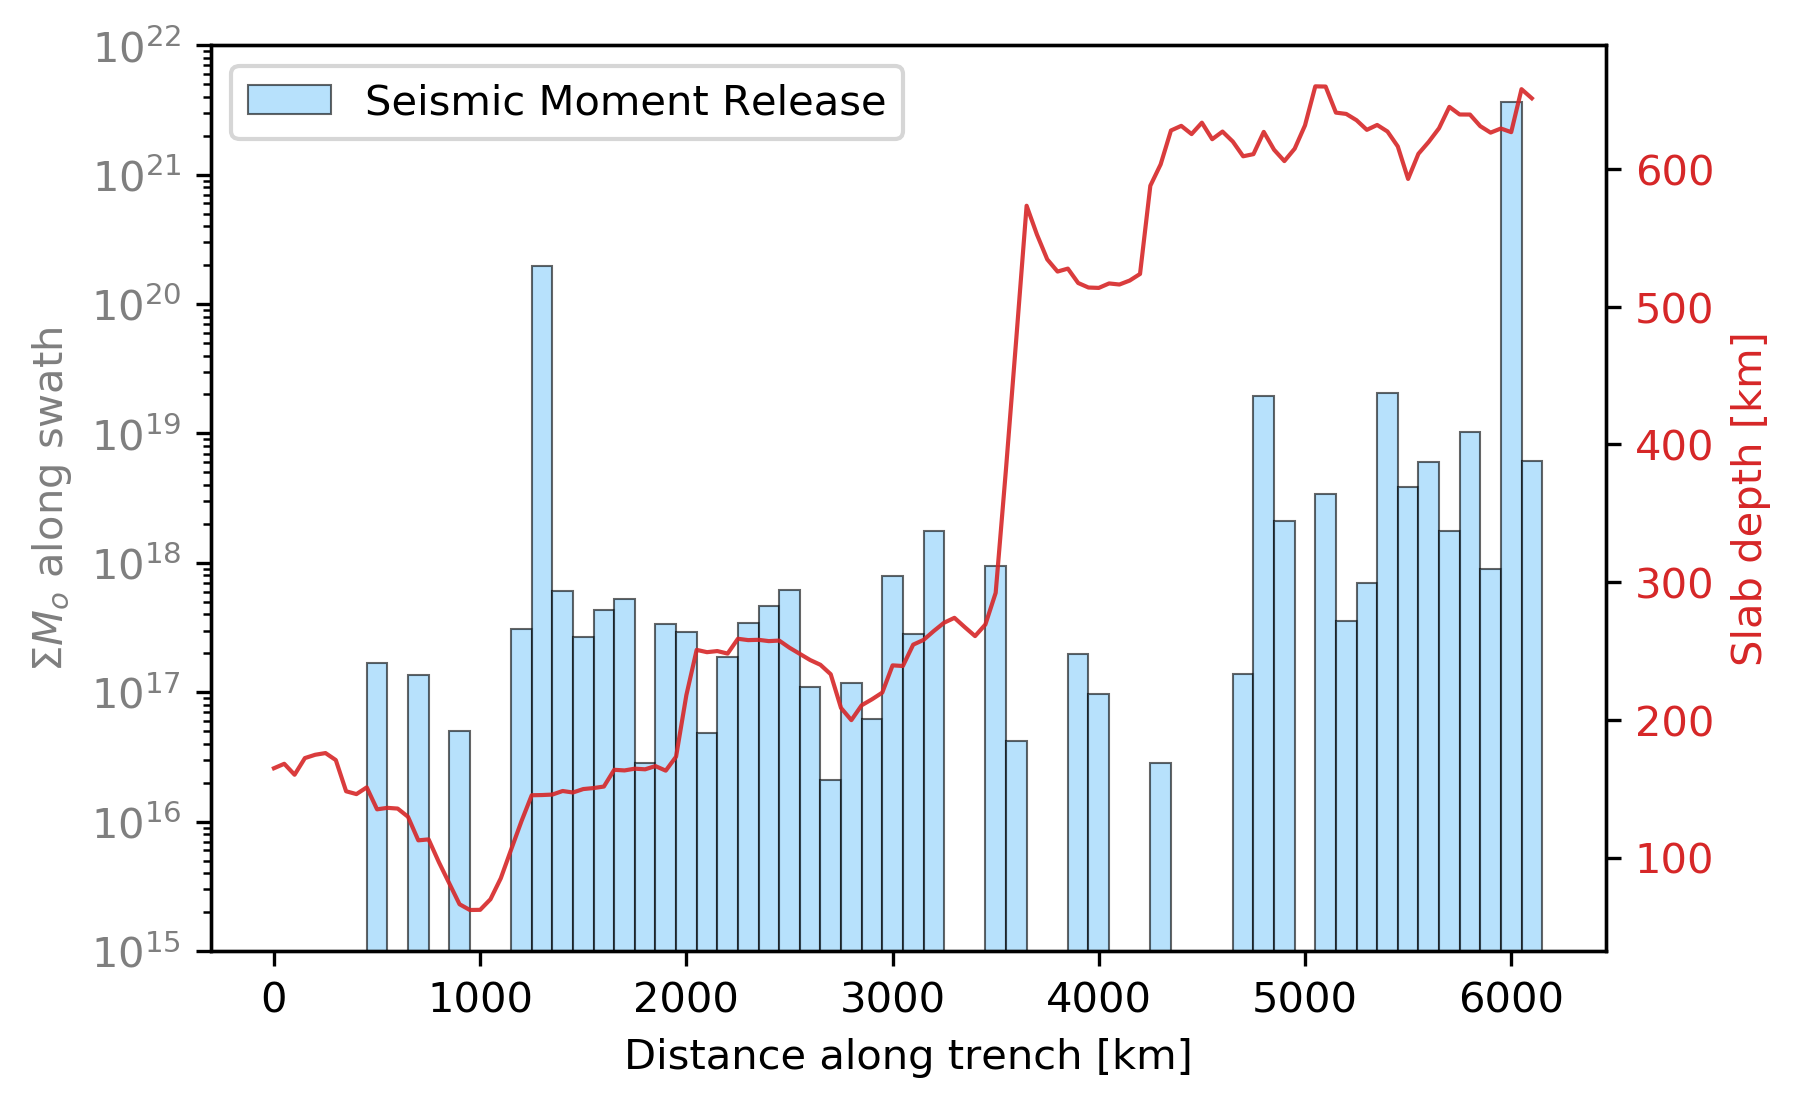

In [170]:
fig, ax1 = plt.subplots(dpi = 300)

plt.yscale('log')
color = 'tab:gray'
ax1.set_xlabel('Distance along trench [km]')
ax1.set_ylabel(r'$\Sigma$$M_o$ along swath', color=color)  # we already handled the x-label with ax1
plot = ax1.bar(data_along_pos, data_along_energy, color = 'lightskyblue', linewidth = 0.5, edgecolor = 'k', width = width, alpha = 0.6, label= 'Seismic Moment Release')
ax1.tick_params(axis='y', labelcolor=color)
# ax1.set_ylim([1e15, 1e21])
ax1.set_ylim([1e15, 1e22])
plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Slab depth [km]', color=color)
ax2.plot(slab_length['ALONG'], slab_length['LENGTH']*-1, '-', color=color, alpha = 0.9, markersize = 3, linewidth = 1)
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim([-30, 20])
# ax2.set_xlim([0, 5800])
# plt.title('Downgoing Plate Normal Earthquakes (1976-2019)')
# plt.title('Forebulge Thrust Earthquakes')
# plt.savefig('DW_N_20km.png', dpi = 300)
# plt.title('Downgoing Plate Normal Earthquakes (Depth < 50 km)')
# plt.savefig('FB_T.png', dpi = 300)

In [158]:
data_df = data_N_DW.sort_values(by = 'ALONG',ascending=True)
data_along_pos = pd.unique(data_df['ALONG'])
data_along_energy = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy.append(np.sum(energy))
    
data_along_energy = np.asarray(data_along_energy)

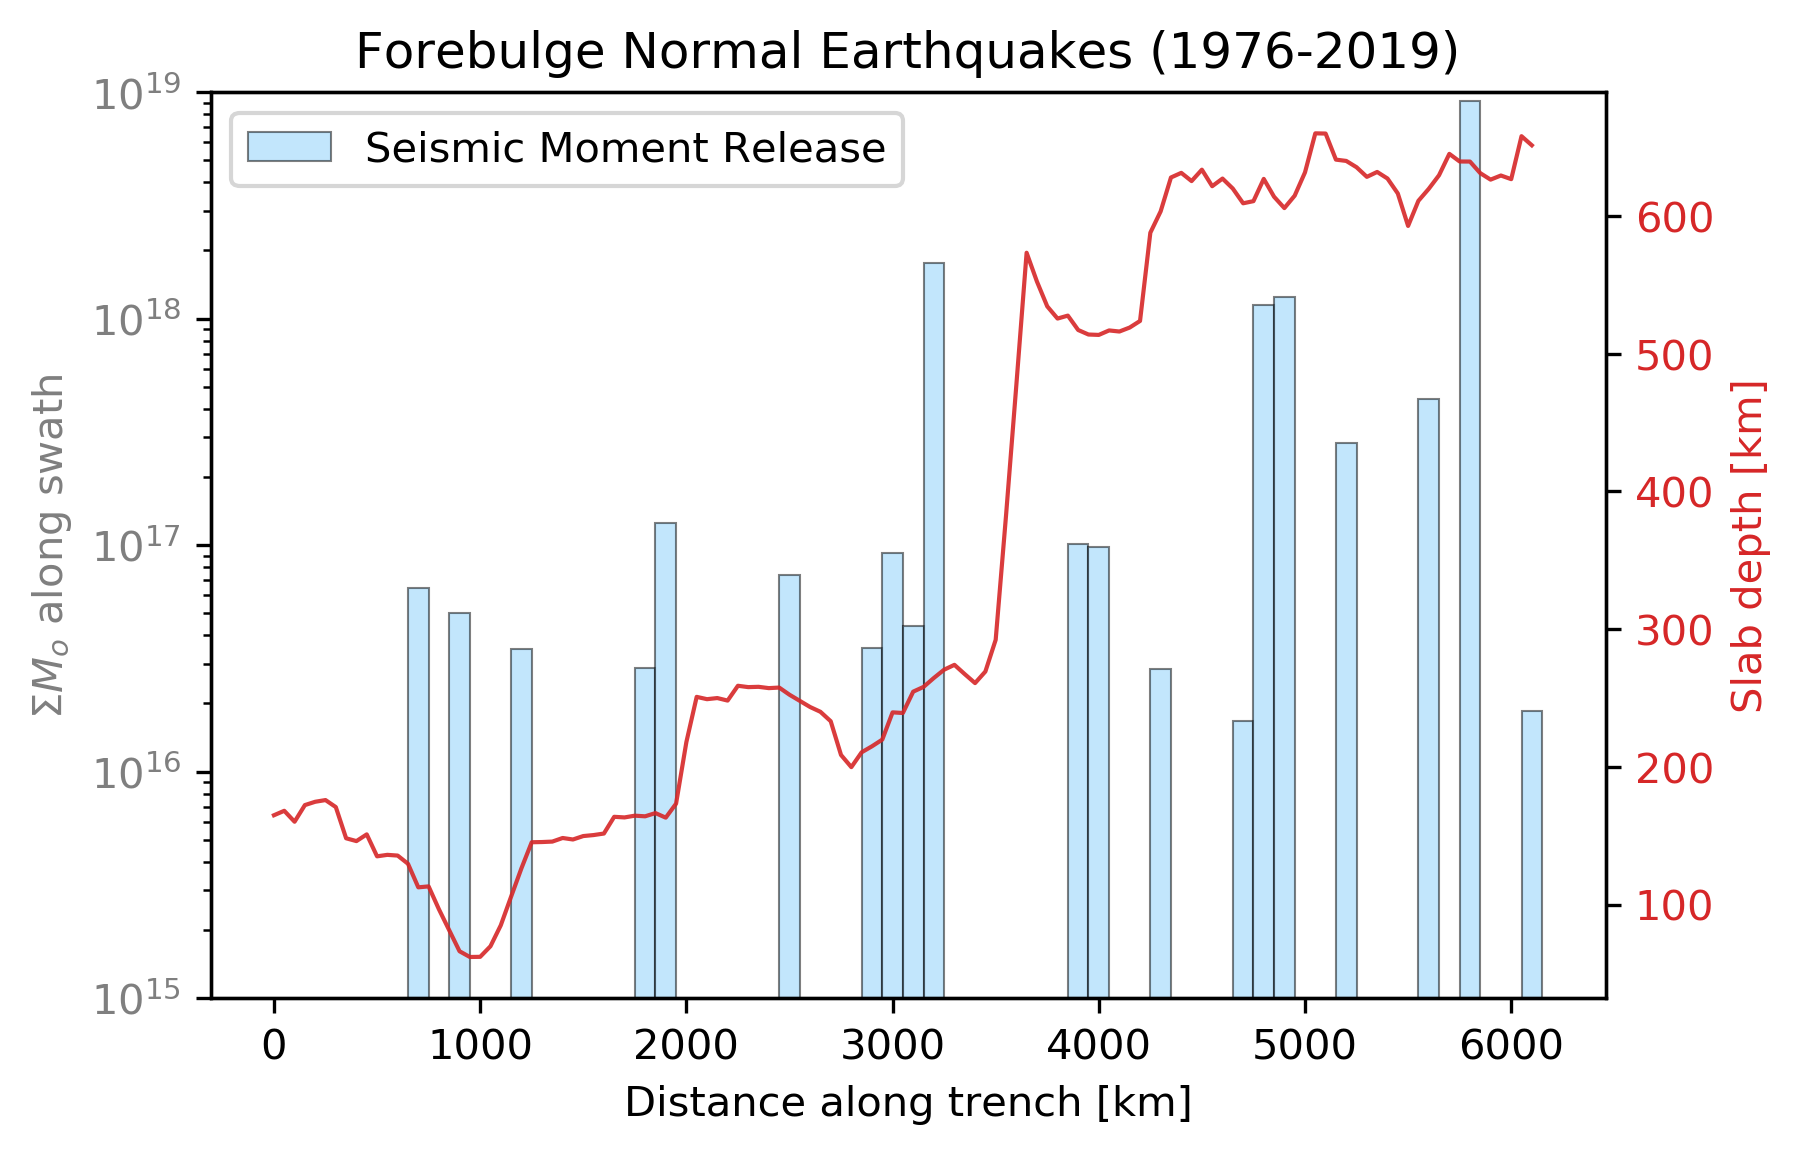

In [160]:
fig, ax1 = plt.subplots(dpi = 300)

plt.yscale('log')
color = 'tab:gray'
ax1.set_xlabel('Distance along trench [km]')
ax1.set_ylabel(r'$\Sigma$$M_o$ along swath', color=color)  # we already handled the x-label with ax1
plot = ax1.bar(data_along_pos, data_along_energy, color = 'lightskyblue', linewidth = 0.5, edgecolor = 'k', width = width, alpha = 0.5, label= 'Seismic Moment Release')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([1e15, 1e19])
plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Slab depth [km]', color=color)
ax2.plot(slab_length['ALONG'], slab_length['LENGTH']*-1, '-', color=color, alpha = 0.9, markersize = 3, linewidth = 1)
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim([-30, 20])
# ax2.set_xlim([0, 5000])
plt.title('Forebulge Normal Earthquakes (1976-2019)')
# plt.title('Downgoing Plate Thrust Earthquakes (Depth < 20 km)')
# plt.savefig('DW_Nor_mo_vs_trench.png', dpi = 300)
# plt.savefig('DW_T_20km.png', dpi = 300)

# plt.title('Downgoing Plate Thrust Earthquakes (Depth < 50 km)')
# plt.savefig('DW_Nor_mo_vs_trench.png', dpi = 300)
# plt.savefig('DW_T_50km.png', dpi = 300)
plt.savefig('FB_N.png', dpi = 300)

In [ ]:
data_df = data_SS_DW.sort_values(by = 'ALONG',ascending=True)
data_along_pos = pd.unique(data_df['ALONG'])
data_along_energy = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy.append(np.sum(energy))
    
data_along_energy = np.asarray(data_along_energy)
data_along_energy.shape

In [ ]:
fig, ax1 = plt.subplots(dpi = 300)

plt.yscale('log')
color = 'tab:gray'
ax1.set_xlabel('Distance along trench [km]')
ax1.set_ylabel(r'$\Sigma$$M_o$ along swath', color=color)  # we already handled the x-label with ax1
plot = ax1.bar(data_along_pos, data_along_energy, color = 'gray', linewidth = 0.1, edgecolor = 'k', width = width, alpha = 0.5, label= 'Seismic Moment Release')
ax1.tick_params(axis='y', labelcolor=color)
plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Slab depth [km]', color=color)
ax2.plot(slab_length['ALONG'], slab_length['LENGTH']*-1, '-', color=color, alpha = 0.9, markersize = 3, linewidth = 1)
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim([-30, 20])
ax2.set_xlim([0, 5000])
plt.title('Downgoing Plate Strike Slip Earthquakes along trench (1976-2019)')
# plt.savefig('DW_SS_mo_vs_trench.png', dpi = 300)

Under the depth of 300 km

In [ ]:
data_DW_300 = data_DW[data_DW['DEPTH'] < 300]
data_N_DW_300 = data_N_DW[data_N_DW['DEPTH'] < 300]
data_T_DW_300 = data_T_DW[data_T_DW['DEPTH'] < 300]
data_SS_DW_300 = data_SS_DW[data_SS_DW['DEPTH'] < 300]

In [ ]:
data_df = data_T_DW_300.sort_values(by = 'ALONG',ascending=True)
data_along_pos = pd.unique(data_df['ALONG'])
data_along_energy = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy.append(np.sum(energy))
    
data_along_energy = np.asarray(data_along_energy)

In [ ]:
fig, ax1 = plt.subplots(dpi = 300)

plt.yscale('log')
color = 'tab:gray'
ax1.set_xlabel('Distance along trench [km]')
ax1.set_ylabel(r'$\Sigma$$M_o$ along swath', color=color)  # we already handled the x-label with ax1
plot = ax1.bar(data_along_pos, data_along_energy, color = 'lightskyblue', linewidth = 0.5, edgecolor = 'k', width = width, alpha = 0.65, label= 'Seismic Moment Release')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([1e15, 1e21])
plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Slab depth [km]', color=color)
ax2.plot(slab_length['Along'], slab_length['Slab length']*-1, '-', color=color, alpha = 0.9, markersize = 3, linewidth = 1)
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim([-30, 20])
ax2.set_xlim([0, 5000])
# plt.title('Downgoing Plate Thrust Earthquakes along trench (1976-2019) under 350 km')
# plt.savefig('DW_SS_mo_vs_trench.png', dpi = 300)

In [ ]:
data_SS_DW['MW'].max()
data_SS_DW[data_SS_DW['MW'] == 7.2]

# Cumulative energy in the downgoing plate and upper plate and both

In [ ]:
# code for getting the cumulative energy in the downgoing and upper plate and both

ds = 100 # steps in the along direction (100 km for this case)
s_max = data['ALONG'].max() # earthquake data

s_arr = np.arange(0, s_max + ds, ds)
s_idx = np.arange(0, s_arr.shape[0], 1) #index for iterating through s_arr

In [ ]:
cum_energy_up = np.zeros(s_arr.shape[0])
cum_energy_dw = np.zeros(s_arr.shape[0])

In [ ]:
# code for getting the cumulative value per bin without using grouby
for i, pos in zip(s_idx, s_arr):
    
    subset_up = data_UP[data_UP['ALONG'] == pos]
    subset_dw = data_DW[data_DW['ALONG'] == pos]
    
#     subset_up = data_T_UP[data_T_UP['ALONG'] == pos]
#     subset_dw = data_T_DW[data_T_DW['ALONG'] == pos]
    
    # work with upper
    exp = np.asarray(subset_up['EX'])
    mo = np.asarray(subset_up['MO'])
    energy = mo*np.power(10., exp)
    cum_energy_up[i] = energy.sum() #total energy in this bin
    
    # work with downgoing
    exp = np.asarray(subset_dw['EX'])
    mo = np.asarray(subset_dw['MO'])
    energy = mo*np.power(10., exp)
    cum_energy_dw[i] = energy.sum() # total energy in this bin
    
# get total moment per bin by adding cum_energy_dw and cum_energy_up
cum_energy_tot = cum_energy_dw + cum_energy_up
z1 = cum_energy_up / cum_energy_tot
z2 = cum_energy_dw / cum_energy_tot

In [ ]:
fig, ax1 = plt.subplots(dpi = 300)

plt.yscale('log')
color = 'tab:gray'
ax1.set_xlabel('Distance along trench [km]')
ax1.set_ylabel('Total Energy', color=color)  # we already handled the x-label with ax1
plot = ax1.bar(s_arr, cum_energy_tot, color = 'lightskyblue', linewidth = 0.5, edgecolor = 'k', width = width, alpha = 0.5, label= 'Seismic Moment Release')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([1e16, 1e21])
# plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Slab depth [km]', color=color)
ax2.plot(slab_length['Along'], slab_length['Slab length']*-1, '-', color=color, alpha = 0.9, markersize = 3, linewidth = 1)
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim([-30, 20])
ax2.set_xlim([0, 5000])
plt.title('Cumulative Total Energy (Upper + Downgoing)')
# plt.savefig('CUM_UP_DW.png', dpi = 300)

In [ ]:
# Upper / Upper + Downgoing

fig, ax1 = plt.subplots(dpi = 300)

# plt.yscale('log')
color = 'tab:gray'
ax1.set_xlabel('Distance along trench [km]')
ax1.set_ylabel('Upper / Total', color=color)  # we already handled the x-label with ax1
plot = ax1.bar(s_arr, z1, color = 'lightskyblue', linewidth = 0.5, edgecolor = 'k', width = width, alpha = 0.5, label= 'Seismic Moment Release')
ax1.tick_params(axis='y', labelcolor=color)
# plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Slab depth [km]', color=color)
ax2.plot(slab_length['Along'], slab_length['Slab length']*-1, '-', color=color, alpha = 0.9, markersize = 3, linewidth = 1)
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim([-30, 20])
ax2.set_xlim([0, 5000])
# plt.title('Cumulative Upper / Total')
# plt.savefig('CUM_UP_by_To.png', dpi = 300)

In [ ]:
fig, ax1 = plt.subplots(dpi = 300)

# plt.yscale('log')
color = 'tab:gray'
ax1.set_xlabel('Distance along trench [km]')
ax1.set_ylabel('Downgoing / Total', color=color)  # we already handled the x-label with ax1
plot = ax1.bar(s_arr, z2, color = 'lightskyblue', linewidth = 0.5, edgecolor = 'k', width = width, alpha = 0.5, label= 'Seismic Moment Release')
ax1.tick_params(axis='y', labelcolor=color)
# plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Slab depth [km]', color=color)
ax2.plot(slab_length['Along'], slab_length['Slab length']*-1, '-', color=color, alpha = 0.9, markersize = 3, linewidth = 1)
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim([-30, 20])
ax2.set_xlim([0, 5000])
# plt.title('Cumulative Downgoing / Upper + Downgoing')
# plt.savefig('CUM_DW_by_To.png', dpi = 300)

In [1]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "zuhair-alig31/seismotectonics" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/zuhair-alig31/seismotectonics


'https://jovian.ai/zuhair-alig31/seismotectonics'